# MAE 223: Multibody Dynamics: Project

### Tammer Barkouki
### Fall 2019

<a id='toc'></a>
## Table of Contents
- [Introduction](#introduction)
- [Background](#background)
- [Approach](#approach)
- [Summary of Results](#results)
- [References](#references)
- [SymPy Model](#sympy)
 - [Problem Description](#problem)
 - [Generalized Coordinates](#gc)
 - [Generalized Speeds](#gs)
 - [Constants](#con)
 - [Reference Frames](#ref)
 - [Points](#pts)
 - [Linear Velocities](#lvel)
 - [Angular Velocities](#avel)
 - [Kinematical Differential Equations](#kdes)
 - [Loads](#loads)
 - [Mass and Inertia](#mass)
 - [Kane's Equations](#kane)
- [Simulation](#sim)
 - [Optimization and Sentivity Analysis](#optimo)
 - [Plots of Generalized Coordinates and Speeds](#plots)
- [Animation](#animation)

[_Back to Table of Contents_](#toc)
<a id='introduction'></a>
# Introduction
The system modeled here is a type of small wooden toy with few moving parts that uses its shape and gravity to "hop" down an incline. The motion of this toy fits the hopping actions of kangaroos and rabbits where the rear legs move together and the animal shifts its weight forward in order re-position the legs. These toys are simple to DIY and there are several instructional websites and videos available online ([1, 2](#references)). The primary reseach question motivating this work is, based on an understanding of how this passive walking motion occurs, what parameters of the system drive performance, defined here as the fastest achievable stable hop.

<a id='background'></a>
## Background 
There exists a rich body of research launched by Tad McGeer ([3](#references)) that is motivated by the motion of "Passive Dynamic Walkers", the study of which is used in human locomotion and legged-robotics research ([4](#references)). These toys are designed to hop themselves down a slight grade by rocking back and forth, alternating between the front and rear contact points contacting the ground.  This rocking temporarily lifts the legs which swing  forward  when  the  front  contacts  the  ground, afterwhich the body rotates backwards again and while translating forward as it pivots on the leg. The figure below (adapted from Tervino et al ([5](#references))) illustrates the phases of a single hop in ten steps (a through j) for a similar type of toy.  A hop begins with the body rocking, and the rear legs swinging, forward (a−b).  When the body rotates back, the rear legs contacts the ramp (c−d) and the front leg (fixed to the body) is lifted (e−f).  The body, with its CG in front of the rear leg pivot, translates down the incline as it pivots on the rear leg (g).  When it rocks forward again, the front leg is further down the ramp (h) and rocks forward to lift the rear leg off the ramp(i), which swings forward again (j). The star symbol in steps (a), (f), and (j) illustrate when the angle between the body and the swinging leg hits its maximum range of motion, which is a constraint modeled herein.

<img src="images\walker.png">

[_Back to Table of Contents_](#toc)
<a id='approach'></a>
## Approach
The SymPy library, using Kane's Method, was used to set up and model the dynamic walking toys and to explore how geomtery and mass properties control their performance. Detailed modeling decisions are presented in markdown throughout the [SymPy Model](#sympy) section below. Briefly, the model consists of two rigid bodies for the rabbit's "body" and swinging "leg". They are connected at the pivot point which is slightly in front of the body's center of mass. The wooden toy has a small dowel that puts a limit in range of motion of the leg, and this was modeled as a contact force that is triggered when the leg is +/- 20 degrees off vertical relative to the body. The effect of the ramp is modeled as a force that is trigged by the location of three points on the rabbit model - two on the body representing the front and rear contact points, and one on the leg, and their heights above the y-axis of the $R$ reference frame, which is rotated $\gamma$ degrees from the inertial $N$ reference frame. Aside from the contact forces of the small dowel and the ramp, which were modeled following Ackermann and van den Bogert ([6](#references)), the only force acting on the system is the weight.

The PyDy, matplotlib, numpy, and pythreejs libraries were then invoked to [simulate](#sim) and [animate](#animate) the results. Values for geometry and mass properties were initially estimated and/or calculated based on the drawings of the toys and then adjusted in order to generate a working model that exhibited a stable hop. A subset of the model "constants" were treated as variable parameters and then [optimized](#opt) to produce a model that hopped the furthest distance down the ramp given a fixed amount of time and with a fixed ramp angle. Distance in the simulation translates to speed, which for a passive process can directly measures efficiency since there is no cost, e.g. for fuel. In true brute force fashion, optimization was done by running multiple simulations and slightly adjusting each parameter one at a time, then comparing the final postion on the ramp at the end of the simulation. Since varying the parameters effected the initial motion in unexpected ways, the first 100 time steps are not accounted for in the comparison in order to allow the model to enter into a stable hop. This way the distance comparsion only considers the stable portion of the hopping. The simulation that produced the greated distance for each parameter was stored in an array, and the best simulation was then used to produce the animation.  Finally, a crude 3D .stl file was generated in Autocad using the DIY instructions [1](#references) and used to generate a toy-looking mesh for the [animation](#animation). Some additional dependencies are required to do this (https://pypi.org/project/numpy-stl/).

<a id='results'></a>
## Summary of Results
A successful model was generated that exhibits very similar hopping motion as in the videos that originally motived this effort ([1, 2](#references)). Success was simply seeing that the model settled into a stable hopping motion, without the model stalling, tripping, and with no observable attenuation of the speed after establishing the stable hop. This was verified by examining the [plots](#plots) of the generalized coordinates and generalized speeds. Using the stable configuration as a baselone for optimization, parameters were varied as explained above. As expected, most sensitive parameters are related to geometry, e.g. the body width (in this context "width" is the front-to-rear distance), the height of the leg, and the x-offset of the body-leg pivot point to the body's center of gravity. Less sensitive parameters are the mass and moment of inertia of the body and leg, and the y-offset of the pivot. This suggests that once a stable configuration is achieved, the geometry should not be adjusted, or at a minimum should be greatly constrained. Physically, an efficient walker with a given geometry has body mass properties that allow it to rotate at the highest frequency, and a leg that rotates at just the right angluar speed so as to reach as much of its range of motion before landing on the ground. However, since the time when the leg swings and contants the ground is driven by the rotation of the body, this is a non-linear problem and beyond the scope of this project to find the absolute maximum performance.

It is convenient that mass properties make forgiving parameters to optimize because they can be easily adjusted in a real physical model, e.g. by iteratively adding small weights (like lead fishing weights) or hollowing the existing wooden model with a dremel, whereas changing the geometry of a wooden model is usually an irreversible process.

Although not demonstrated in the simulation below, the acceleration due to gravity was changed to the value for the moon ($1.62 m/s^2$) to explore the change in performance (speed down the ramp). As expected, performance declined, but what is noteworthy is that because passive walking relies on the rotation of both the body and leg, and performance is driven by where the leg is when it contacts the ground, one can see that to maximize performance on the moon, the mass and/or moments of inertia of the leg would be a big driver of efficiency when starting with a model optimized for earth walking.

[_Back to Table of Contents_](#toc)
<a id='references'></a>
## References

1. wombatmorrison. https://www.instructables.com/id/Designing-Hopping-Animal-and-Comic-Book-Character-/. "Designing Hopping Animal and Comic Book Character playthings." _www.instructables.com_. Instructables, Jul 2, 2011. Accessed Oct 11, 2019.

2. wombatmorrison. https://www.youtube.com/watch?v=s1qOY_7xrTs. "Wood hopping bunny toy." Online video clip. _www.youtube.com_. YouTube, Jul 1, 2011. Accessed Oct 9, 2019.

3. McGeer, T. https://www.cs.cmu.edu/~hgeyer/Teaching/R16-899B/Papers/McGeer90IJRR.pdf. _Passive Dynamic Walking_. Article. The International Journal of Robotics Research, April 1990.

4. Collins, S., et al. https://science.sciencemag.org/content/307/5712/1082. _Efficient Bipedal Robots Based on Passive-Dynamic Walkers._ Article. Science, February 2005.

5. Trevino, C.L., J.D. Galloway II, P.A. Bhounsule. http://mechanismsrobotics.asmedigitalcollection.asme.org/article.aspx?articleid=2686558. _A Three-Dimensional Printed, Non-Assembly, Passive Dynamic Walking Toy: Design and Analysis_. Article. Journal of Mechanisms and Robotics, June 2018.

6. Ackermann and van den Bogert. _Optimality principles for model-based prediction of human gait._ Article. Journal of Biomechanics, 2010.

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

[_Back to Table of Contents_](#toc)
<a id='sympy'></a>
## SymPy Model
<a id='problem'></a>
### Problem Description

<img src="images\Bunny Diagram.jpg">

#### Generalized Coordinates
$q_1, q_2, q_3, q_4$, $n=4$

#### Generalized Speeds
$u_1, u_2, u_3, u_4$, $p=4$

#### Rigid Bodies
$B (b_o, m_b, I_{b_o}), L (l_o, m_l, I_{l_o})$

#### Loads (forces + torques)
- gravitation force on $B$ and $L$
- normal force on $B$ at either $C_1$ or $C_2$, and on $L$ at $C_3$
- static friction on $B$ at either $C_1$ or $C_2$ and on $L$ at $C_3$
- contact force on $B$ and $L$ at $B_d$ and $L_d$ repectively
 
#### Constants
- $w_b$ effective "width" of the body, measured as distance from $C_1$ to $C_2$ in x-dimension
- $h_b$ height of the body
- $w_l$ width of the leg
- $h_l$ height of the leg
- $d_x$ offet in x direction of $P$ from $B_o$
- $d_y$ offet in y direction of $P$ from $B_o$
- $m_b$ mass of the body
- $m_l$ mass of the leg
- $I_{B_{bo}}$ moment of inertia of the body along z-axis at $B_o$
- $I_{L_{lo}}$ moment of inertia of the leg along z-axis at $L_o$
- $g$ acceleration due to gravity
- $k_c$ stiffness parameter for calculating contact force
- $c_c$ damping parameter for calculating contact force
- $\mu$ coefficient of friction
- $v_s$ scaling factor (for calculating Coulomb friction)
- $\gamma$ angle of the inclined ramp
- $\alpha_l$ maximum leg range of motion relative to body (max angle forward or backward)
- $r$ half of ramp thickness

[_Back to Table of Contents_](#toc)
<a id='gc'></a>
### Generalized Coordinates

In [2]:
q1, q2, q3, q4 = me.dynamicsymbols('q1:5')

<a id='gs'></a>
### Generalized Speeds

In [3]:
u1, u2, u3, u4 = me.dynamicsymbols('u1:5')

<a id='con'></a>
### Constants

In [4]:
wb, hb, wl, hl, dx, dy, mb, ml, IB_bo, IL_lo, g, kc, cc, mu, vs, gamma, alphal, r = sm.symbols('w_b, h_b, w_l, h_l, d_x, d_y, m_b, m_l, I_{B_{bo}}, I_{L_{lo}}, g, k_c, c_c, mu, v_s, gamma, alpha_l, r')
wb, hb, wl, hl, dx, dy, mb, ml, IB_bo, IL_lo, g, kc, cc, mu, vs, gamma, alphal, r

<a id='rf'></a>
### Reference Frames

In [5]:
N = me.ReferenceFrame('N')
B = N.orientnew('B', 'Axis', (q3, N.z))         # Body
L = N.orientnew('L', 'Axis', (q4, N.z))         # Legs
R = N.orientnew('R', 'Axis', (-gamma, N.z))     # Ramp

<a id='pts'></a>
### Points

In [6]:
O = me.Point('O')

$P$ is pivot point, fixes $B$ to $L$. Position relative to $N$ frame.

In [7]:
P =  O.locatenew('P', q1*N.x + q2*N.y)
P.pos_from(O)

$B_o$ is mass center of the body. Position relative to $P$ in $B$ frame, displaced by $d_x$ and $d_y$.

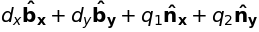

In [8]:
Bo = P.locatenew('B_o', dx*B.x + dy*B.y)
Bo.pos_from(O)

$L_o$ is mass center of legs rigid body. Positive relative to $L$ frame.

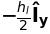

In [9]:
Lo = P.locatenew('L_o', (-hl/2)*L.y)
Lo.pos_from(P)

$C_1$ and $C_2$ are locations of body contact points. Positions relative to $B$ frame.

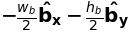

In [10]:
C1 = P.locatenew('C_1', (dx-wb/2)*B.x + (dy-hb/2)*B.y)
C1.pos_from(Bo)

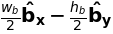

In [11]:
C2 = P.locatenew('C_1', (dx+wb/2)*B.x + (dy-hb/2)*B.y)
C2.pos_from(Bo)

$C_3$ is location of legs contact point. Position relative to $L$ frame.

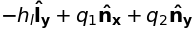

In [12]:
C3 = P.locatenew('C_3', (-hl)*L.y)
C3.pos_from(O)

$L_d$ is the leg dowel that keeps the legs under the body. Roughly 3/4 down the leg.

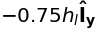

In [13]:
Ld = P.locatenew('L_d', (-0.75*hl)*L.y)
Ld.pos_from(P)

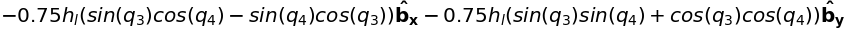

In [14]:
Bd = P.locatenew('B_d', (Ld.pos_from(P).dot(B.x)*B.x + (Ld.pos_from(P).dot(B.y)*B.y)))
Bd.pos_from(P)

[_Back to Table of Contents_](#toc)
<a id='lvel'></a>
### Linear Velocities

In [15]:
P.set_vel(N, u1*N.x + u2*N.y)
P.vel(N)

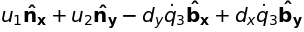

In [16]:
Bo.v2pt_theory(P, N, B)

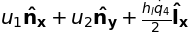

In [17]:
Lo.v2pt_theory(P, N, L)

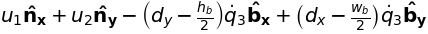

In [18]:
C1.v2pt_theory(P, N, B)

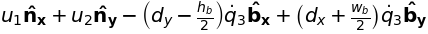

In [19]:
C2.v2pt_theory(P, N, B)

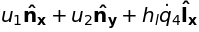

In [20]:
C3.v2pt_theory(P, N, L)

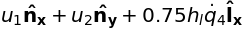

In [21]:
Ld.v2pt_theory(P, N, L)

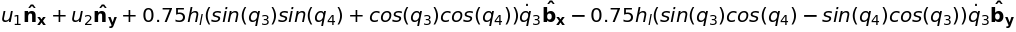

In [22]:
Bd.v2pt_theory(P, N, B)

<a id='avel'></a>
### Angular Velocities

In [23]:
B.set_ang_vel(N, -u3*N.z)
B.ang_vel_in(N)

In [24]:
L.set_ang_vel(N, -u4*N.z)
L.ang_vel_in(N)

[_Back to Table of Contents_](#toc)
<a id='kdes'></a>
### Kinematical Differential Equations

In [25]:
u1_eq = sm.Eq(u1, q1.diff())
u2_eq = sm.Eq(u2, q2.diff())
u3_eq = sm.Eq(u3, q3.diff())
u4_eq = sm.Eq(u4, q4.diff())
qdots = sm.solve([u1_eq, u2_eq, u3_eq, u4_eq], q1.diff(), q2.diff(), q3.diff(), q4.diff())
kdes = [u1_eq.rhs - u1_eq.lhs,
        u2_eq.rhs - u2_eq.lhs,
        u3_eq.rhs - u3_eq.lhs,
        u4_eq.rhs - u4_eq.lhs]
kdes

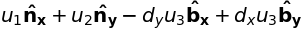

In [26]:
Bo.set_vel(N, Bo.vel(N).subs(qdots).simplify())
Bo.vel(N)

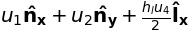

In [27]:
Lo.set_vel(N, Lo.vel(N).subs(qdots).simplify())
Lo.vel(N)

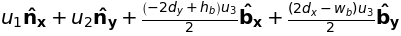

In [28]:
C1.set_vel(N, C1.vel(N).subs(qdots).simplify())
C1.vel(N)

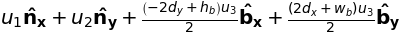

In [29]:
C2.set_vel(N, C2.vel(N).subs(qdots).simplify())
C2.vel(N)

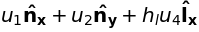

In [30]:
C3.set_vel(N, C3.vel(N).subs(qdots).simplify())
C3.vel(N)

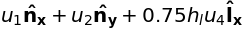

In [31]:
Ld.set_vel(N, Ld.vel(N).subs(qdots).simplify())
Ld.vel(N)

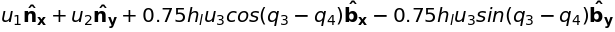

In [32]:
Bd.set_vel(N, Bd.vel(N).subs(qdots).simplify())
Bd.vel(N)

[_Back to Table of Contents_](#toc)
<a id='mass'></a>
### Mass and Inertia

In [33]:
mb, ml

In [34]:
IB = me.inertia(B, 0, 0, IB_bo)
IB

In [35]:
IL = me.inertia(L, 0, 0, IL_lo)
IL

<a id='loads'></a>
### Loads

#### Contact Forces

$C_1$ is the rear contact point of the body on the ramp, $y_1$ is perpendicular distance from the ramp:

In [36]:
y1 = C1.pos_from(O).dot(R.y) - r
y1

In [37]:
penetration1 = (sm.Abs(y1) - y1)/2
vertical_force1 = (kc*penetration1**3 - y1)*(1-cc*C1.vel(N).dot(R.y))
friction_force1 = -mu*vertical_force1*((2/(1+sm.exp(-C1.vel(N).dot(R.x)/vs))) - 1)
contact_force1 = friction_force1*R.x + vertical_force1*R.y

$C_2$ is the front contact point of the body on the ramp:

In [38]:
y2 = C2.pos_from(O).dot(R.y) - r
y2

In [39]:
penetration2 = (sm.Abs(y2) - y2)/2
vertical_force2 = (kc*penetration2**3 - y2)*(1-cc*C2.vel(N).dot(R.y))
friction_force2 = -mu*vertical_force2*((2/(1+sm.exp(-C2.vel(N).dot(R.x)/vs))) - 1)
contact_force2 = friction_force2*R.x + vertical_force2*R.y

$C_3$ is the legs' contact point with the ramp:

In [40]:
y3 = C3.pos_from(O).dot(R.y) - r
y3

In [41]:
penetration3 = (sm.Abs(y3) - y3)/2
vertical_force3 = (kc*penetration3**3 - y3)*(1-cc*C3.vel(N).dot(R.y))
friction_force3 = -mu*vertical_force3*((2/(1+sm.exp(-C3.vel(N).dot(R.x)/vs))) - 1)
contact_force3 = friction_force3*R.x + vertical_force3*R.y

$L_d$ is the legs' dowel, which keeps the legs under the body (collision based on difference in angle between legs and body):

In [42]:
leg_angle = sm.Abs(q4 - q3)
leg_rate = sm.Abs(u4 - u3)

In [43]:
swing_penetration = sm.sign(q4-q3)*(sm.Abs(alphal - leg_angle) - ((alphal) - leg_angle))/2

In [44]:
contact_force_dowel_on_leg = -(100)*((swing_penetration)**3)*(1 - sm.sign(q4-q3)*2.0*cc*L.ang_vel_in(N).dot(N.z))*L.x
contact_force_dowel_on_body = - contact_force_dowel_on_leg

#### Gravitational Forces

In [45]:
RBo = -(mb*g)*N.y
RBo

In [46]:
RLo = -(ml*g)*N.y
RLo

[_Back to Table of Contents_](#toc)
<a id='kane'></a>
### Kane's Equations

In [47]:
kdes

In [48]:
body = me.RigidBody('body', Bo, B, mb, (IB, Bo))

In [49]:
legs = me.RigidBody('legs', Lo, L, ml, (IL, Lo))

In [50]:
bodies = [body, legs]

loads = [(Bo, RBo),
         (Lo, RLo),
         (C1, contact_force1),
         (C2, contact_force2),
         (C3, contact_force3),
         (Ld, contact_force_dowel_on_leg),
         (Bd, contact_force_dowel_on_body)]

In [51]:
kane = me.KanesMethod(N, (q1, q2, q3, q4), (u1, u2, u3, u4), kd_eqs=kdes)
fr, frstar = kane.kanes_equations(bodies, loads=loads)

[_Back to Table of Contents_](#toc)
<a id='sim'></a>
## Simulation

In [52]:
from pydy.system import System
import numpy as np
import matplotlib.pyplot as plt

sys = System(kane)

# Method to setup and run the .integrate() function, returns the x array
def simulation(constants):
    sys.constants = {wb: constants[0],
                     hb: 0.05,
                     hl: constants[1],
                     dx: constants[2],
                     dy: constants[3],
                     mb: constants[4],
                     ml: constants[5],
                     IB_bo: constants[6],
                     IL_lo: constants[7],
                     g: constants[8],
                     kc: 5.0e9,
                     cc: 0.9,
                     mu: 1.0,
                     vs: 0.005,
                     gamma: 0.40,
                     alphal: 0.25,
                     r: 0.125}
    
    sys.times = np.linspace(0.0, 20.0, num=500)
    sys.initial_conditions = {q1: 0.0,
                              q2: 0.1675,
                              q3: -0.35,
                              q4: -0.1,
                              u1: 0.0,
                              u2: 0.0,
                              u3: 0.0,
                              u4: 0.0}
    x = sys.integrate()
    return x

<a id='optimo'></a>
### Optimization and Sensitivity Analysis

#### Helper Functions

In [53]:
# runs array used to store tuples of the results of simulations and the distances they achieved
runs = []

# Method to return the simulation with the max distance
def get_max(runs):
    max_dist = 0
    max_X = []
    for run in runs:
        if run[0] > max_dist:
            max_dist = run[0]
            max_X = run[1]
    return max_X

# Method to compare two x arrays, ommitting the first 100 time steps,
# and returning the distance the model achieved down the ramp
def distance(X):
    start = np.sqrt(X[99][0]*X[99][0] + X[99][1]*X[99][1])
    end = np.sqrt(X[499][0]*X[499][0] + X[499][1]*X[499][1])
    return end - start

In [54]:
# Method to simulate() and distance() methods,
# prints the distnace achieved in each simulation
# and returns the index and the x array of the best run.
# Parameters: index is the index of the "constant" array,
# ie. this is the parameter were optimizing
# arr is the array of values to run on this parameter.
def optimize(index, arr):
    const = [0.07, 0.03, -0.005, 0.0, 0.1, 0.08, 0.0075, 0.0007, 9.81]
    results_arr = []
    x_arr = []
    for value in arr:
        const[index] = value
        x = simulation(const)
        x_arr.append(x)
        dist = distance(x)
        print(dist)
        results_arr.append(dist)
        
    dist = np.amax(results_arr)
    best_ind = np.argmax(results_arr)
    print(best_ind)
    best_x = x_arr[best_ind]
        
    return dist, best_x

#### Optimizations on different parameters

To keep the execution time of this notebook reasonable, only the optimization of the first parameters is active. The other cells below are set to "raw". Feel free to make them "code" cells to run optimization on other parameters.

In [55]:
ind = 0 # wb, width of the body
#arr = [0.065, 0.07, 0.075]
arr = [0.07]

best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

0.3109132992060224
0


ind = 2 # hl, height of the leg
arr = [-0.005, -0.004, -0.003]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

ind = 3 # dx, x-offset of pivot
arr = [-0.001, 0.0, 0.001]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

ind = 4 # dy, y-offset of pivot
arr = [0.25, 0.26, 0.27]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

ind = 5 # ml, mass of the leg
arr = [0.09, 0.1, 0.11]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

ind = 6 # IB_bo, mom of inertia of the body
arr = [0.0065, 0.007, 0.0075]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

ind = 7 # IL_lo, mom of inertia of the leg
arr = [0.0006, 0.0007, 0.0008]
best, x = optimize(ind, arr)
run = (best, x)
runs.append(run)
best

In [56]:
x = get_max(runs)

[_Back to Table of Contents_](#toc)
<a id='plots'></a>
### Plots of Generalized Coordinates and Speeds

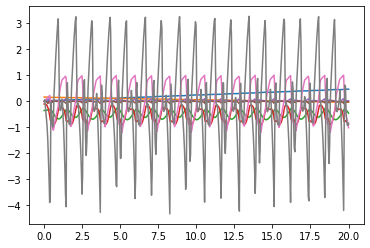

In [57]:
axes = plt.plot(sys.times, x)

Text(0, 0.5, 'Angle [deg]')

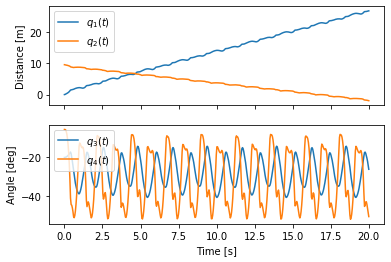

In [58]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(sys.times, np.rad2deg(x[:, (0,1)]))
axes[0].legend([sm.latex(q, mode='inline') for q in (q1, q2)])
axes[0].set_ylabel('Distance [m]')
axes[1].plot(sys.times, np.rad2deg(x[:, 2:4]))
axes[1].legend([sm.latex(q, mode='inline') for q in (q3, q4)])
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Angle [deg]')

Text(0, 0.5, 'Angular Velocity [deg/s]')

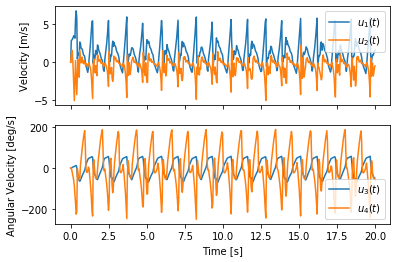

In [59]:
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(sys.times, np.rad2deg(x[:, (4,5)]))
axes[0].legend([sm.latex(q, mode='inline') for q in (u1, u2)])
axes[0].set_ylabel('Velocity [m/s]')
axes[1].plot(sys.times, np.rad2deg(x[:, 6:8]))
axes[1].legend([sm.latex(q, mode='inline') for q in (u3, u4)])
axes[1].set_xlabel('Time [s]')
axes[1].set_ylabel('Angular Velocity [deg/s]')

[_Back to Table of Contents_](#toc)
<a id='animation'></a>
## Animation

In [60]:
from pydy.viz.shapes import Cube, Cylinder, Sphere, Plane
from pydy.viz.visualization_frame import VisualizationFrame
from pydy.viz import Scene
import pythreejs as pjs
from stl import mesh

Define PyDy shapes for the body and legs

In [61]:
body_shape = Plane(0, 0, color='red')
legs_shape = Plane(0, 0, color='blue')
ramp_shape = Plane(2*r, 10*r, color='green')

Create visualization frames that attach a shape to a reference frame and point.

In [62]:
v1 = VisualizationFrame('body', B, Bo.locatenew('Bc', -(hb/2)*B.y - (wb/2)*B.x), body_shape)
v2 = VisualizationFrame('legs', L, Lo.locatenew('Lc', -(hl/2)*L.y - (0.01*L.x)), legs_shape)
v3 = VisualizationFrame('ramp', R, O, ramp_shape)

Create a scene with the origin point O and base reference frame N, then setup the scene with `create_static_html()`.

In [63]:
scene = Scene(N, O, v1, v2, v3, system=sys)
scene.create_static_html(overwrite=True, silent=True)

In [64]:
# Note, you may need to run "pip install numpy-stl" to get the stl import to work
# https://pypi.org/project/numpy-stl/

body_mesh = mesh.Mesh.from_file('stl_files/bunny_body.stl')
body_vertices = pjs.BufferAttribute(array=body_mesh.vectors, normalized=False)
body_geometry = pjs.BufferGeometry(attributes={'position': body_vertices}, )
my_mesh = pjs.Mesh(body_geometry, pjs.MeshStandardMaterial(color='brown'),
    name='body')

legs_mesh = mesh.Mesh.from_file('stl_files/bunny_leg.stl')
legs_vertices = pjs.BufferAttribute(array=legs_mesh.vectors, normalized=False)
legs_geometry = pjs.BufferGeometry(attributes={'position': legs_vertices}, )
my_legs_mesh = pjs.Mesh(legs_geometry, pjs.MeshStandardMaterial(color='yellow'),
    name='legs')

ramp_mesh = pjs.Mesh(
    pjs.BoxBufferGeometry(height=.25, width=1.27, depth=0.1),
    pjs.MeshStandardMaterial(color='green'),
    name='ramp'
)

In [65]:
volume, cog, inertia = body_mesh.get_mass_properties()
print("Volume                                  = {0}".format(volume))
print("Position of the center of gravity (COG) = {0}".format(cog))
print("Inertia matrix at expressed at the COG  = {0}".format(inertia[0,:]))
print("                                          {0}".format(inertia[1,:]))
print("                                          {0}".format(inertia[2,:]))

Volume                                  = 1.4713407344110231e-05
Position of the center of gravity (COG) = [0.04448651 0.03083386 0.002501  ]
Inertia matrix at expressed at the COG  = [ 2.12406774e-09 -5.81879569e-10 -5.79128420e-17]
                                          [-5.81879569e-10  7.54738484e-09 -3.98858861e-18]
                                          [-5.79128420e-17 -3.98858861e-18  9.61014670e-09]


Use the transformation matrices over time to define animation tracks for the meshes.

In [66]:
body_matrices = v1.evaluate_transformation_matrix(x, list(sys.constants.values()))
legs_matrices = v2.evaluate_transformation_matrix(x, list(sys.constants.values()))
ramp_matrices = v3.evaluate_transformation_matrix(x, list(sys.constants.values()))

body_track = pjs.VectorKeyframeTrack(
    name='scene/body.matrix',
    times=list(sys.times),
    values=body_matrices)

legs_track = pjs.VectorKeyframeTrack(
    name='scene/legs.matrix',
    times=list(sys.times),
    values=legs_matrices)

ramp_track = pjs.VectorKeyframeTrack(
    name='scene/ramp.matrix',
    times=list(sys.times),
    values=ramp_matrices)

`matrixAutoUpdate` should be set to false so that we can directly manipulate the transformation matrices.

In [67]:
my_mesh.matrixAutoUpdate = False
my_legs_mesh.matrixAutoUpdate = False
ramp_mesh.matrixAutoUpdate = False

Set the initial orientation and position of the objects in the scene.

In [68]:
my_mesh.matrix = body_matrices[0]
my_legs_mesh.matrix = legs_matrices[0]
ramp_mesh.matrix = ramp_matrices[0]

In [69]:
body_matrices[0]

Create some axes indicators.

In [70]:
x_arrow = pjs.ArrowHelper(dir=[1, 0, 0], length=1.0, color='blue')
y_arrow = pjs.ArrowHelper(dir=[0, 1, 0], length=1.0, color='red')
z_arrow = pjs.ArrowHelper(dir=[0, 0, 1], length=1.0,color='green')

Setup the scene.

In [71]:
view_width = 800
view_height = 600

camera = pjs.PerspectiveCamera(position=[.5, 0.5, 0.5],
                               aspect=view_width/view_height)
key_light = pjs.DirectionalLight(position=[0, 1, 1])
ambient_light = pjs.AmbientLight()

scene_pjs = pjs.Scene(children=[my_mesh, my_legs_mesh, ramp_mesh,
                                x_arrow, y_arrow, z_arrow, 
                                camera, key_light, ambient_light])

controller = pjs.OrbitControls(controlling=camera)
renderer = pjs.Renderer(camera=camera, scene=scene_pjs, controls=[controller], width=view_width, height=view_height)

Show the scene:

In [72]:
renderer

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, position=(0.5, 0.5, 0.5), quaternion=(0.0, 0.0, 0…

Setup and show the animation controls:

In [73]:
clip = pjs.AnimationClip(tracks=[body_track, legs_track], duration=sys.times[-1])
action = pjs.AnimationAction(pjs.AnimationMixer(scene_pjs), clip, scene_pjs)
action

AnimationAction(clip=AnimationClip(duration=20.0, tracks=(VectorKeyframeTrack(name='scene/body.matrix', times=…

[_Back to Table of Contents_](#toc)